In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Dense, Input, Dropout, LSTM
from keras._tf_keras.keras.regularizers import l2

np.random.seed(123)
tf.random.set_seed(123)

In [36]:
df0 = pd.read_csv('ETH-USD.csv', index_col=0, parse_dates=True)
df = df0[['Close']].copy()
df['LogClose'] = np.log(df['Close'])
df['DiffLogClose'] = df['LogClose'].diff()

In [37]:
def build_lstm_model(activation = 'relu', units=50, dropout_rate=0.2, regularization_rate=0.01, optimizer='adam'):
    i = Input(shape=(Tx,1)) 
    x = LSTM(units, activation=activation, kernel_regularizer=l2(regularization_rate), 
    return_sequences=True)(i) 
    x = Dropout(dropout_rate)(x)  
    x = LSTM(units, activation=activation, kernel_regularizer=l2(regularization_rate), return_sequences=False)(x) 
    x = Dropout(dropout_rate)(x) 
    x = Dense(Ty)(x)  
    model = Model(inputs=i, outputs=x)
    model.compile(loss='mape', optimizer=optimizer) 
    return model

In [38]:
param_grid = {
    'model__units': [32, 64],  
    'model__activation': ['relu', 'sigmoid'],  
    'model__optimizer': ['adam', 'rmsprop'],  
    'model__dropout_rate': [0.1, 0.2], 
    'model__regularization_rate': [0.01, 0.001], 
    'epochs': [50, 100],
}

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Epoch 1/100
10/10 - 7s - 728ms/step - loss: 457.9532 - val_loss: 100.0765
Epoch 2/100
10/10 - 0s - 21ms/step - loss: 307.4066 - val_loss: 97.9820
Epoch 3/100
10/10 - 0s - 24ms/step - loss: 331.3035 - val_loss: 94.3224
Epoch 4/100
10/10 - 0s - 20ms/step - loss: 263.8233 - val_loss: 102.1191
Epoch 5/100
10/10 - 0s - 20ms/step - loss: 242.8277 - val_loss: 102.4054
Epoch 6/100
10/10 - 0s - 19ms/step - loss: 275.3348 - val_loss: 97.3677
Epoch 7/100
10/10 - 0s - 22ms/step - loss: 269.3027 - val_loss: 99.5168
Epoch 8/100
10/10 - 0s - 20ms/step - loss: 302.2558 - val_loss: 97.3811
Epoch 9/100
10/10 - 0s - 20ms/step - loss: 237.9076 - val_loss: 93.5787
Epoch 10/100
10/10 - 0s - 22ms/step - loss: 245.7912 - val_loss: 99.7787
Epoch 11/100
10/10 - 0s - 19ms/step - loss: 208.3565 - val_loss: 107.8421
Epoch 12/100
10/10 - 0s - 23ms/step - loss: 227.2009 - val_loss: 108.8564
Epoch 13/100
10/10 - 0s - 22ms/step - loss: 231.7123 - val_loss: 

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
41/41 - 8s - 190ms/step - loss: 354.0167 - val_loss: 138.1225
Epoch 2/50
41/41 - 1s - 13ms/step - loss: 395.0563 - val_loss: 119.5359
Epoch 3/50
41/41 - 1s - 14ms/step - loss: 323.5032 - val_loss: 118.6246
Epoch 4/50
41/41 - 1s - 14ms/step - loss: 291.9019 - val_loss: 109.5564
Epoch 5/50
41/41 - 1s - 13ms/step - loss: 260.9529 - val_loss: 106.6336
Epoch 6/50
41/41 - 1s - 13ms/step - loss: 278.7237 - val_loss: 111.8377
Epoch 7/50
41/41 - 1s - 13ms/step - loss: 261.5484 - val_loss: 114.0191
Epoch 8/50
41/41 - 1s - 13ms/step - loss: 289.8430 - val_loss: 106.1829
Epoch 9/50
41/41 - 1s - 13ms/step - loss: 233.5174 - val_loss: 106.9190
Epoch 10/50
41/41 - 1s - 13ms/step - loss: 245.2532 - val_loss: 104.8452
Epoch 11/50
41/41 - 1s - 13ms/step - loss: 251.1284 - val_loss: 109.8677
Epoch 12/50
41/41 - 1s - 13ms/step - loss: 254.2588 - val_loss: 103.0244
Epoch 13/50
41/41 - 1s - 13ms/step - loss: 215.8079 - val_loss: 105.4386
Epoch 14/50
41/41 - 1s - 14ms/step - loss: 212.8927 - val_l

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
57/57 - 11s - 194ms/step - loss: 268.3939 - val_loss: 103.6453
Epoch 2/50
57/57 - 1s - 11ms/step - loss: 207.8631 - val_loss: 104.9080
Epoch 3/50
57/57 - 1s - 11ms/step - loss: 179.9855 - val_loss: 103.7327
Epoch 4/50
57/57 - 1s - 10ms/step - loss: 168.6504 - val_loss: 105.7793
Epoch 5/50
57/57 - 1s - 12ms/step - loss: 159.9275 - val_loss: 100.0695
Epoch 6/50
57/57 - 1s - 11ms/step - loss: 153.1859 - val_loss: 99.8386
Epoch 7/50
57/57 - 1s - 11ms/step - loss: 137.8374 - val_loss: 102.0509
Epoch 8/50
57/57 - 1s - 11ms/step - loss: 131.0188 - val_loss: 98.2405
Epoch 9/50
57/57 - 1s - 11ms/step - loss: 121.8059 - val_loss: 104.4584
Epoch 10/50
57/57 - 1s - 12ms/step - loss: 125.6817 - val_loss: 99.0132
Epoch 11/50
57/57 - 1s - 12ms/step - loss: 116.5091 - val_loss: 102.1787
Epoch 12/50
57/57 - 1s - 11ms/step - loss: 116.3278 - val_loss: 101.3211
Epoch 13/50
57/57 - 1s - 12ms/step - loss: 114.1377 - val_loss: 99.8619
Epoch 14/50
57/57 - 1s - 11ms/step - loss: 111.8026 - val_loss

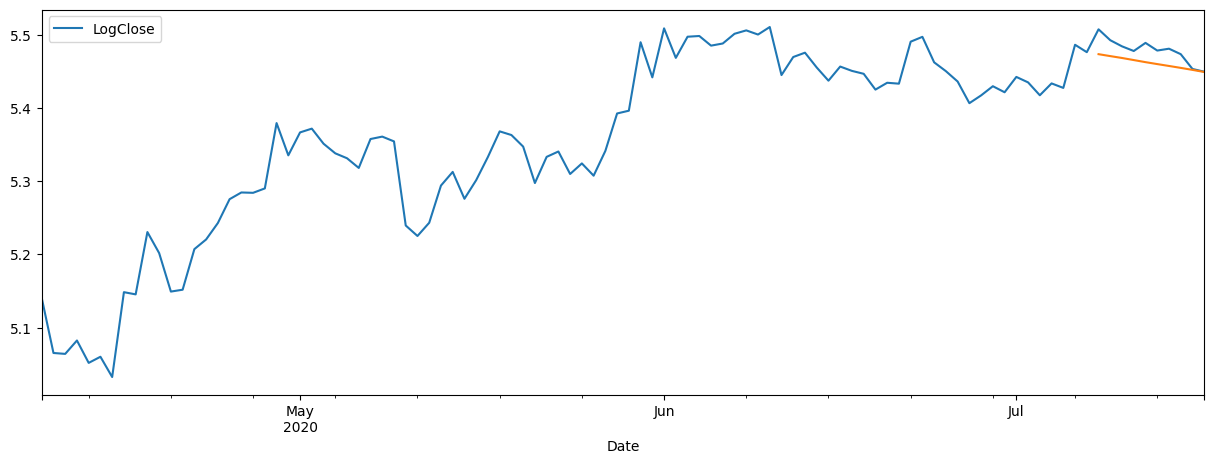

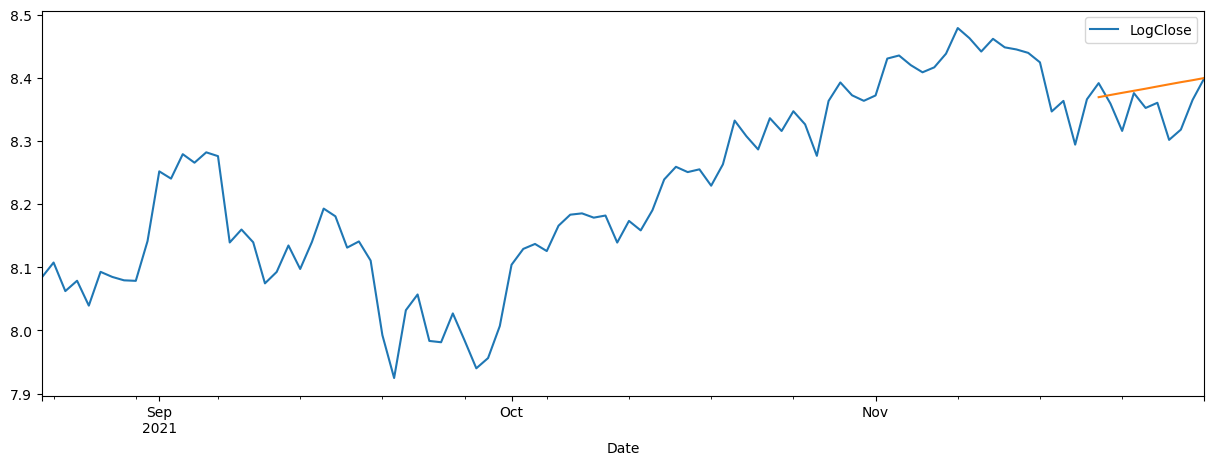

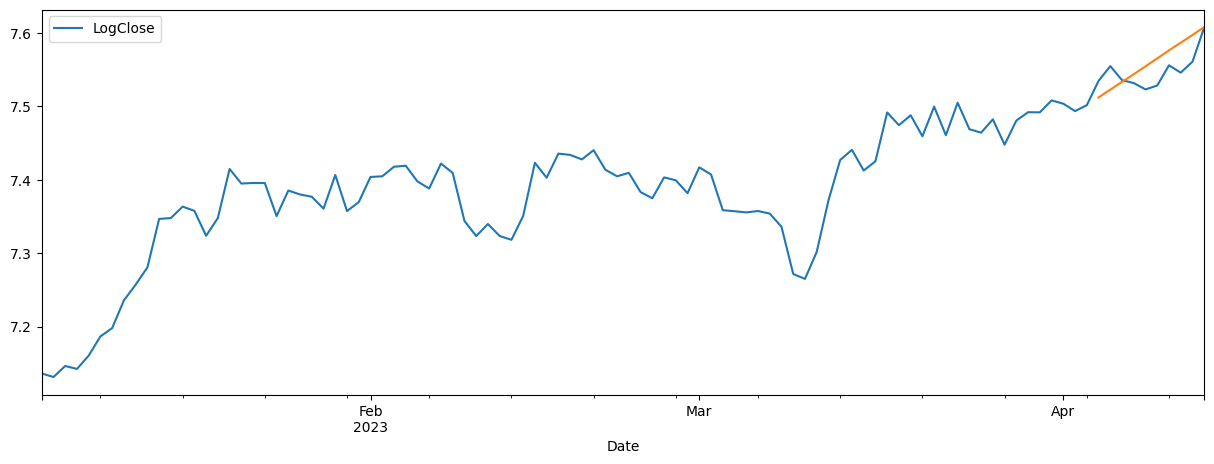

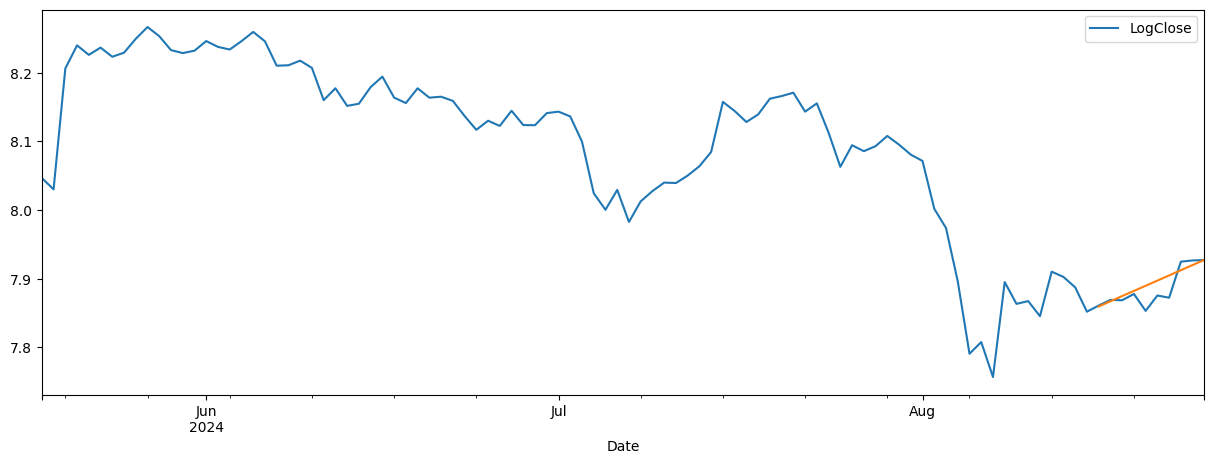

In [14]:
i = 328
real_10d = []
pred_10d = []
while i <= len(df):
    temp = df[:i].copy()
    
    i = i + 500
    
    Ntest = 10
    train = temp.iloc[:-Ntest]
    test = temp.iloc[-Ntest:]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[['DiffLogClose']])
    test_scaled = scaler.fit_transform(test[['DiffLogClose']])
    
    train_idx = temp.index <= train.index[-1]
    test_idx = temp.index > train.index[-1]
    
    temp.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
    temp.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()
    
    series = temp['ScaledLogReturn'].dropna().to_numpy()

    Tx = 10
    Ty = Ntest
    X = []
    Y = []
    for t in range(len(series) - Tx - Ty + 1):
      x = series[t:t+Tx]
      X.append(x)
      y = series[t+Tx:t+Tx+Ty]
      Y.append(y)
    
    X = np.array(X).reshape(-1, Tx,1)
    Y = np.array(Y).reshape(-1, Ty)
    
    Xtrain_m, Ytrain_m = X[:-Ntest], Y[:-Ntest]
    Xtest_m, Ytest_m = X[-Ntest:], Y[-Ntest:]
    
    model = KerasRegressor(model=build_lstm_model, verbose=2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=2)
    grid_result = grid.fit(Xtrain_m, Ytrain_m,validation_data=(Xtest_m, Ytest_m))
    best_model = grid_result.best_estimator_
    
    Ptest = best_model.predict(Xtest_m)
    
    Ptest = Ptest[0]
    
    Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()
    
    last_train = train.iloc[-1]['LogClose']
    
    temp.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)
    
    predicted_temp = np.array(np.exp(temp.loc[test_idx,'multioutput']))
    real_temp = np.array(temp.loc[test_idx,'Close'])
    
    temp.iloc[-100:][['LogClose']].plot(figsize=(15, 5));
    plt.plot(temp.loc[test_idx, 'multioutput'])
    
    pred_10d.append(predicted_temp)
    real_10d.append(real_temp)
    print(pred_10d)
    print('############')
    print(real_10d)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Epoch 1/100
9/9 - 5s - 547ms/step - loss: 526.6737 - val_loss: 119.0729
Epoch 2/100
9/9 - 0s - 38ms/step - loss: 427.9906 - val_loss: 102.4893
Epoch 3/100
9/9 - 0s - 37ms/step - loss: 382.9976 - val_loss: 95.7870
Epoch 4/100
9/9 - 0s - 38ms/step - loss: 382.6126 - val_loss: 104.0669
Epoch 5/100
9/9 - 0s - 35ms/step - loss: 432.8018 - val_loss: 102.1205
Epoch 6/100
9/9 - 0s - 37ms/step - loss: 368.5312 - val_loss: 102.6454
Epoch 7/100
9/9 - 0s - 38ms/step - loss: 377.0114 - val_loss: 111.7248
Epoch 8/100
9/9 - 0s - 37ms/step - loss: 343.6882 - val_loss: 101.1711
Epoch 9/100
9/9 - 0s - 37ms/step - loss: 353.9484 - val_loss: 99.5449
Epoch 10/100
9/9 - 0s - 35ms/step - loss: 340.3692 - val_loss: 91.8208
Epoch 11/100
9/9 - 0s - 37ms/step - loss: 396.1534 - val_loss: 96.4475
Epoch 12/100
9/9 - 0s - 37ms/step - loss: 274.7807 - val_loss: 95.0852
Epoch 13/100
9/9 - 0s - 37ms/step - loss: 383.4000 - val_loss: 97.2640
Epoch 14/100
9/9

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
55/55 - 8s - 151ms/step - loss: 196.6937 - val_loss: 105.2776
Epoch 2/50
55/55 - 4s - 81ms/step - loss: 169.3670 - val_loss: 110.7826
Epoch 3/50
55/55 - 2s - 40ms/step - loss: 156.9375 - val_loss: 99.4665
Epoch 4/50
55/55 - 2s - 41ms/step - loss: 146.5272 - val_loss: 101.9161
Epoch 5/50
55/55 - 2s - 39ms/step - loss: 139.4067 - val_loss: 100.7968
Epoch 6/50
55/55 - 3s - 47ms/step - loss: 128.5234 - val_loss: 103.4776
Epoch 7/50
55/55 - 2s - 40ms/step - loss: 123.7900 - val_loss: 98.7882
Epoch 8/50
55/55 - 2s - 40ms/step - loss: 117.7461 - val_loss: 94.6225
Epoch 9/50
55/55 - 2s - 40ms/step - loss: 114.6684 - val_loss: 99.9365
Epoch 10/50
55/55 - 2s - 39ms/step - loss: 112.6348 - val_loss: 105.9522
Epoch 11/50
55/55 - 2s - 39ms/step - loss: 110.5109 - val_loss: 103.5057
Epoch 12/50
55/55 - 2s - 39ms/step - loss: 107.7405 - val_loss: 103.5821
Epoch 13/50
55/55 - 2s - 39ms/step - loss: 107.2341 - val_loss: 98.2038
Epoch 14/50
55/55 - 2s - 40ms/step - loss: 106.1987 - val_loss: 

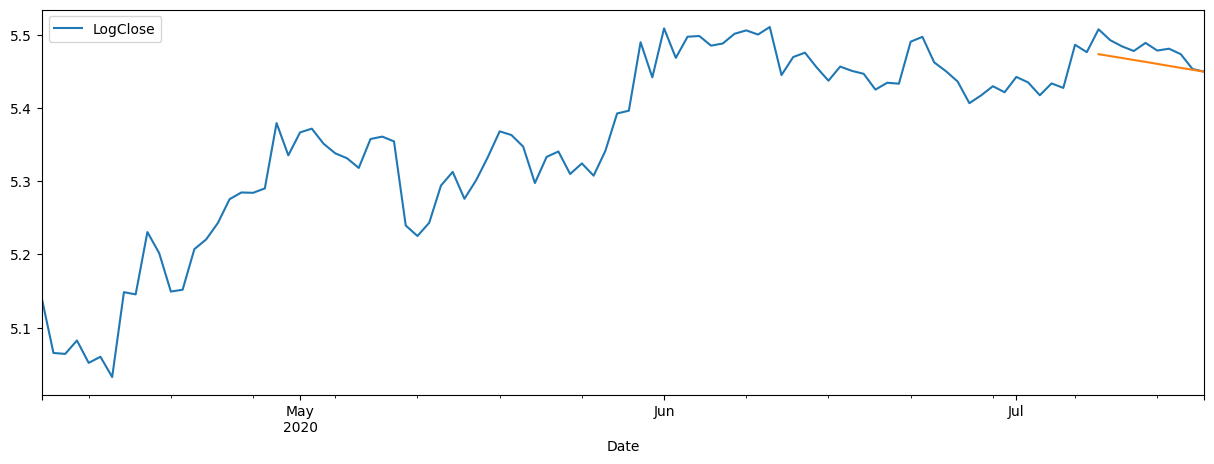

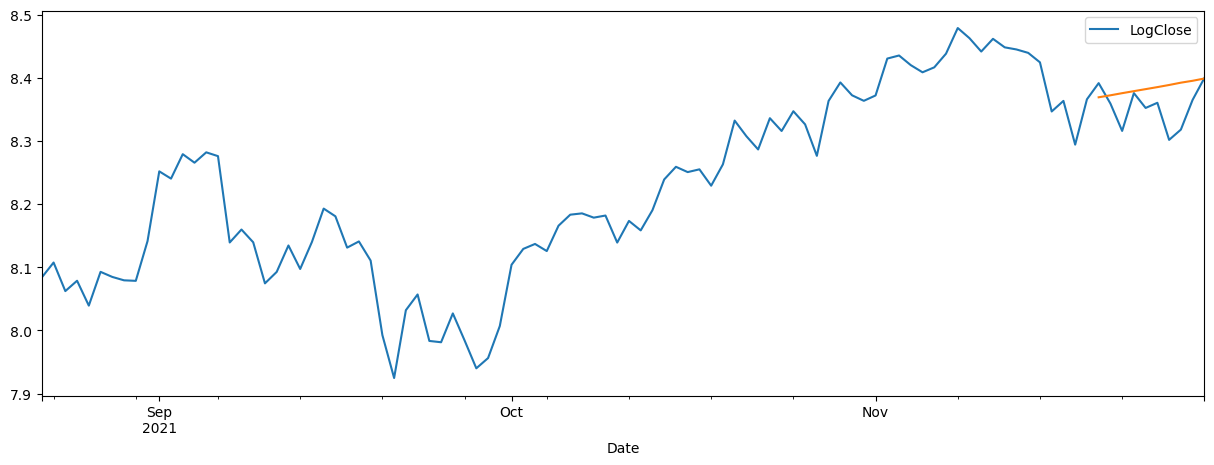

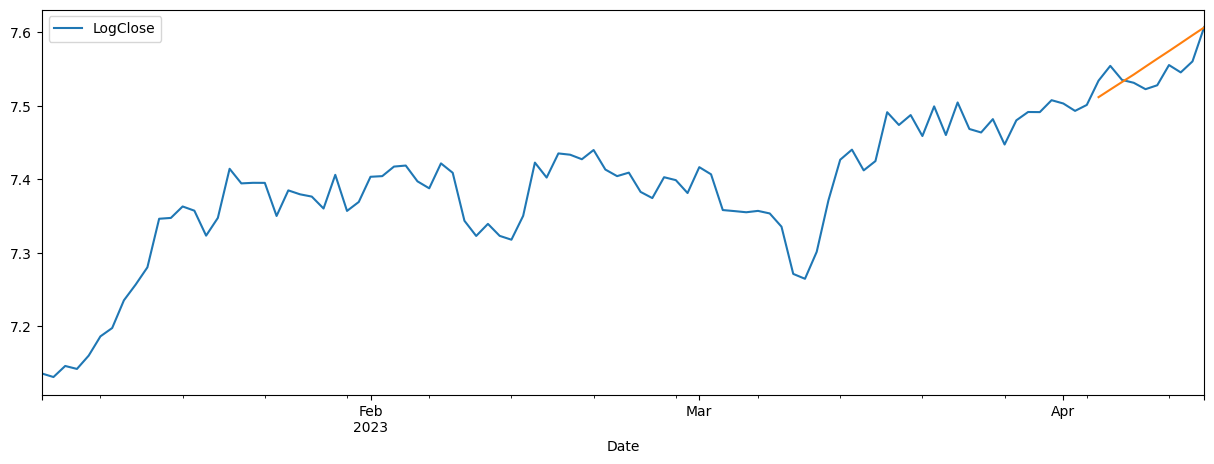

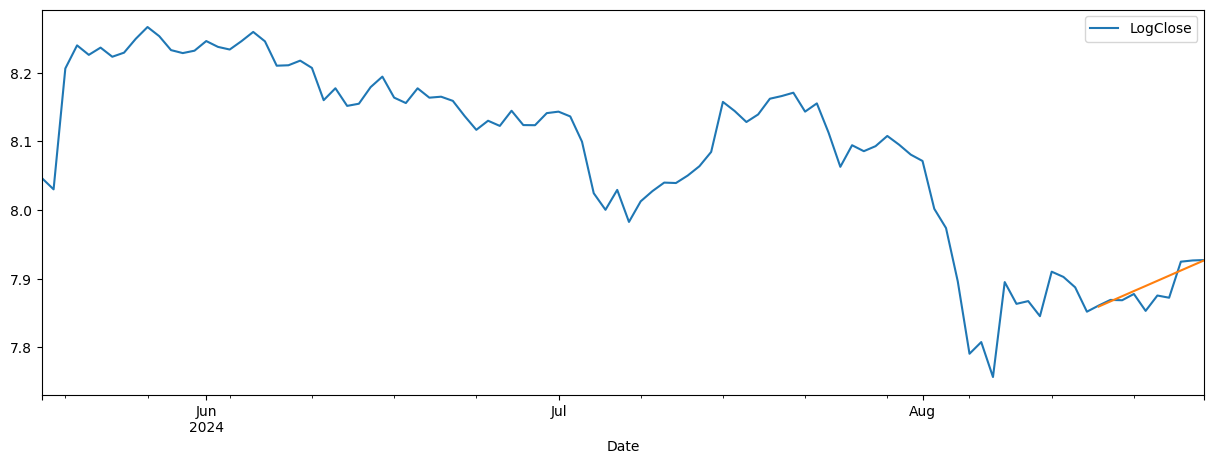

In [25]:
i = 328
real_50d = []
pred_50d = []
while i <= len(df):
    temp = df[:i].copy()
    
    i = i + 500
    
    Ntest = 10
    train = temp.iloc[:-Ntest]
    test = temp.iloc[-Ntest:]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[['DiffLogClose']])
    test_scaled = scaler.fit_transform(test[['DiffLogClose']])
    
    train_idx = temp.index <= train.index[-1]
    test_idx = temp.index > train.index[-1]
    
    temp.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
    temp.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()
    
    series = temp['ScaledLogReturn'].dropna().to_numpy()

    Tx = 50
    Ty = Ntest
    X = []
    Y = []
    for t in range(len(series) - Tx - Ty + 1):
      x = series[t:t+Tx]
      X.append(x)
      y = series[t+Tx:t+Tx+Ty]
      Y.append(y)
    
    X = np.array(X).reshape(-1, Tx,1)
    Y = np.array(Y).reshape(-1, Ty)
    
    Xtrain_m, Ytrain_m = X[:-Ntest], Y[:-Ntest]
    Xtest_m, Ytest_m = X[-Ntest:], Y[-Ntest:]
    
    model = KerasRegressor(model=build_lstm_model, verbose=2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=2)
    grid_result = grid.fit(Xtrain_m, Ytrain_m,validation_data=(Xtest_m, Ytest_m))
    best_model = grid_result.best_estimator_
    
    Ptest = best_model.predict(Xtest_m)
    
    Ptest = Ptest[0]
    
    Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()
    
    last_train = train.iloc[-1]['LogClose']
    
    temp.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)
    
    predicted_temp = np.array(np.exp(temp.loc[test_idx,'multioutput']))
    real_temp = np.array(temp.loc[test_idx,'Close'])
    
    temp.iloc[-100:][['LogClose']].plot(figsize=(15, 5));
    plt.plot(temp.loc[test_idx, 'multioutput'])
    
    pred_50d.append(predicted_temp)
    real_50d.append(real_temp)
    print(pred_50d)
    print('############')
    print(real_50d)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Epoch 1/100
7/7 - 4s - 551ms/step - loss: 941.8058 - val_loss: 144.2221
Epoch 2/100
7/7 - 0s - 49ms/step - loss: 801.7521 - val_loss: 132.6525
Epoch 3/100
7/7 - 0s - 49ms/step - loss: 594.9045 - val_loss: 126.0868
Epoch 4/100
7/7 - 0s - 48ms/step - loss: 578.4702 - val_loss: 117.9891
Epoch 5/100
7/7 - 0s - 47ms/step - loss: 475.4698 - val_loss: 110.9333
Epoch 6/100
7/7 - 0s - 47ms/step - loss: 553.9257 - val_loss: 104.4530
Epoch 7/100
7/7 - 0s - 46ms/step - loss: 347.8399 - val_loss: 100.2271
Epoch 8/100
7/7 - 0s - 45ms/step - loss: 508.7081 - val_loss: 97.5686
Epoch 9/100
7/7 - 0s - 46ms/step - loss: 398.7594 - val_loss: 97.5221
Epoch 10/100
7/7 - 0s - 48ms/step - loss: 377.3563 - val_loss: 98.9763
Epoch 11/100
7/7 - 0s - 45ms/step - loss: 336.5275 - val_loss: 101.8010
Epoch 12/100
7/7 - 0s - 48ms/step - loss: 346.5622 - val_loss: 103.0917
Epoch 13/100
7/7 - 0s - 46ms/step - loss: 394.6154 - val_loss: 103.5927
Epoch 14/100


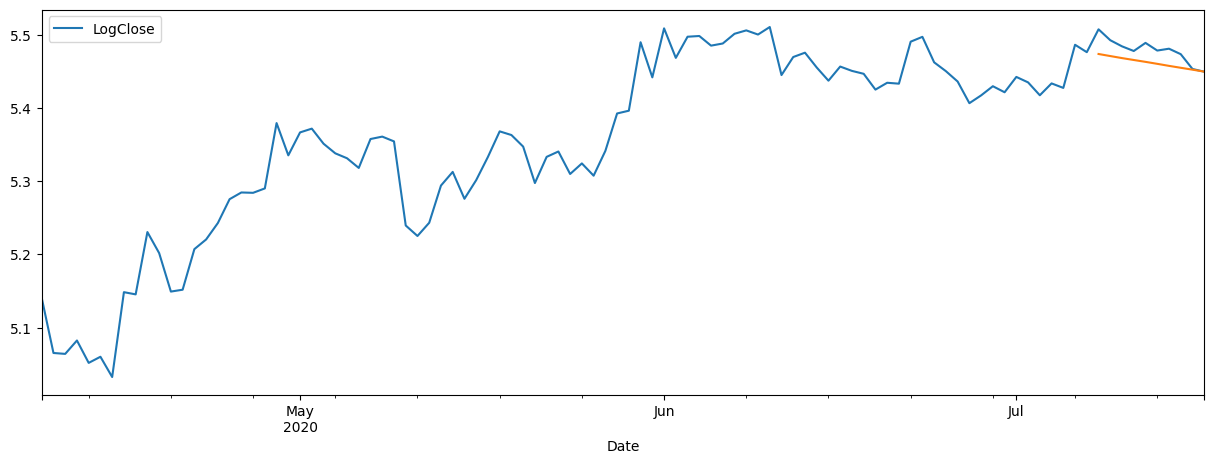

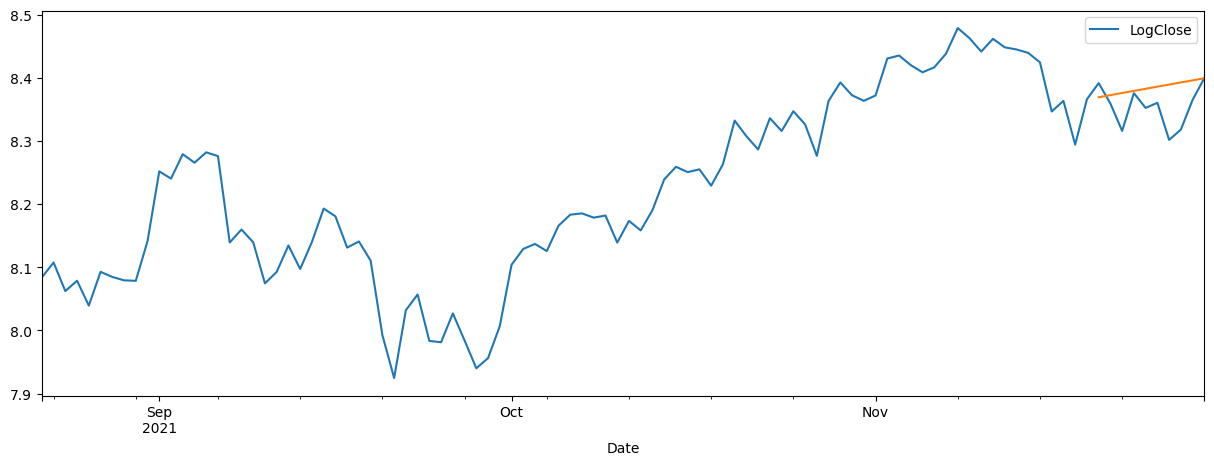

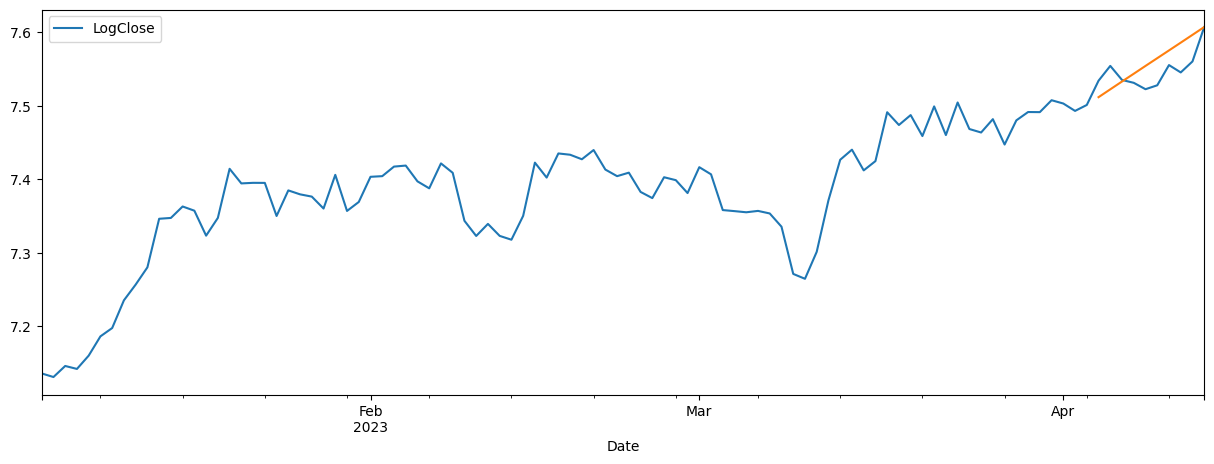

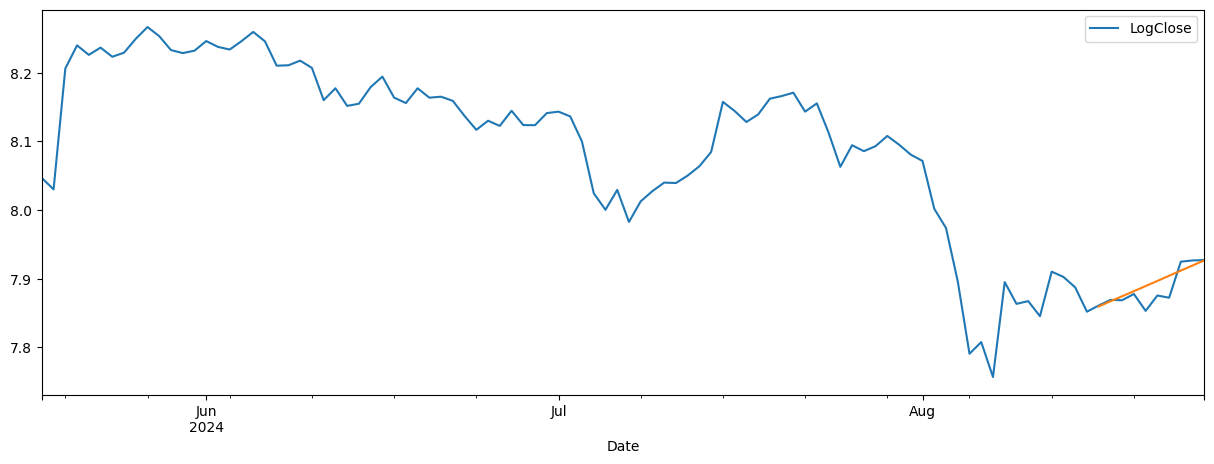

In [39]:
i = 328
real_100d = []
pred_100d = []
while i <= len(df):
    temp = df[:i].copy()
    
    i = i + 500
    
    Ntest = 10
    train = temp.iloc[:-Ntest]
    test = temp.iloc[-Ntest:]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[['DiffLogClose']])
    test_scaled = scaler.fit_transform(test[['DiffLogClose']])
    
    train_idx = temp.index <= train.index[-1]
    test_idx = temp.index > train.index[-1]
    
    temp.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
    temp.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()
    
    series = temp['ScaledLogReturn'].dropna().to_numpy()

    Tx = 100
    Ty = Ntest
    X = []
    Y = []
    for t in range(len(series) - Tx - Ty + 1):
      x = series[t:t+Tx]
      X.append(x)
      y = series[t+Tx:t+Tx+Ty]
      Y.append(y)
    
    X = np.array(X).reshape(-1, Tx,1)
    Y = np.array(Y).reshape(-1, Ty)
    
    Xtrain_m, Ytrain_m = X[:-Ntest], Y[:-Ntest]
    Xtest_m, Ytest_m = X[-Ntest:], Y[-Ntest:]
    
    model = KerasRegressor(model=build_lstm_model, verbose=2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=2)
    grid_result = grid.fit(Xtrain_m, Ytrain_m,validation_data=(Xtest_m, Ytest_m))
    best_model = grid_result.best_estimator_
    
    Ptest = best_model.predict(Xtest_m)
    
    Ptest = Ptest[0]
    
    Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()
    
    last_train = train.iloc[-1]['LogClose']
    
    temp.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)
    
    predicted_temp = np.array(np.exp(temp.loc[test_idx,'multioutput']))
    real_temp = np.array(temp.loc[test_idx,'Close'])
    
    temp.iloc[-100:][['LogClose']].plot(figsize=(15, 5));
    plt.plot(temp.loc[test_idx, 'multioutput'])
    
    pred_100d.append(predicted_temp)
    real_100d.append(real_temp)
    print(pred_100d)
    print('############')
    print(real_100d)

In [40]:
predicted_10d = pred_100d
real_10d = real_100d

In [41]:
predicted_50d = pred_100d
real_50d = real_100d

In [42]:
predicted_100d = pred_100d
real_100d = real_100d

In [43]:
print("R2 score for 10, 50 and 100 days are:",round(r2_score(real_10d, predicted_10d),4), round(r2_score(real_50d, predicted_50d),4),round(r2_score(real_100d, predicted_100d),4))

R2 score for 10, 50 and 100 days are: 0.9947 0.9947 0.9947


In [44]:
print("MAPE score for 10, 50 and 100 days are:",round(mean_absolute_percentage_error(real_10d, predicted_10d)*100,2),round(mean_absolute_percentage_error(real_50d, predicted_50d)*100,2),round(mean_absolute_percentage_error(real_100d, predicted_100d)*100,2))

MAPE score for 10, 50 and 100 days are: 2.22 2.22 2.22


In [45]:
print("MAE scores for 10, 50 and 100 days are:",round(mean_absolute_error(real_10d, predicted_10d),2),round(mean_absolute_error(real_50d, predicted_50d),2),round(mean_absolute_error(real_100d, predicted_100d),2))

MAE scores for 10, 50 and 100 days are: 57.55 57.55 57.55


In [46]:
print("MSE scores for 10, 50 and 100 days are:",round(mean_squared_error(real_10d, predicted_10d),2),round(mean_squared_error(real_50d, predicted_50d),2),round(mean_squared_error(real_100d, predicted_100d),2))

MSE scores for 10, 50 and 100 days are: 10260.41 10260.41 10260.41


In [47]:
print("RMSE scores for 10, 50 and 100 days are:",round(root_mean_squared_error(real_10d, predicted_10d),2),round(root_mean_squared_error(real_50d, predicted_50d),2),round(root_mean_squared_error(real_100d, predicted_100d),2))

RMSE scores for 10, 50 and 100 days are: 82.65 82.65 82.65
